In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode



In [10]:
#importando dataframe
#fonte: http://dados.gov.br/dataset/mec-prouni
pro = pd.read_csv('pda-prouni-2019.csv', error_bad_lines=False,sep=';' ,encoding='latin-1')
pro.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,ADMINISTRACAO,CURSO A DISTANCIA,***03183970**,M,BRANCA,19/08/1993,N,Sul,PR,LONDRINA
1,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,ADMINISTRACAO,CURSO A DISTANCIA,***92848904**,F,BRANCA,03/11/1999,N,Sul,PR,SAO JOSE DOS PINHAIS
2,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,ANALISE E DESENVOLVIMENTO DE SISTEMAS,CURSO A DISTANCIA,***12457929**,M,PARDA,02/04/1999,N,Sul,PR,QUATRO BARRAS
3,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,ANALISE E DESENVOLVIMENTO DE SISTEMAS,CURSO A DISTANCIA,***21386908**,M,BRANCA,15/03/2000,N,Sul,PR,CURITIBA
4,2019,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,EAD,ANALISE E DESENVOLVIMENTO DE SISTEMAS,CURSO A DISTANCIA,***27405933**,M,BRANCA,23/05/1993,N,Sul,PR,SAO JOSE DOS PINHAIS


In [46]:
#fonte: https://github.com/kelvins/Municipios-Brasileiros
mun = pd.read_csv('municipios.csv')
mun.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [50]:
#formantado o texto da coluna 'nome' do dataframe mun para o mesmo formato da coluna 'MUNICIPIO_BENEFICIARIO_BOLSA' 
#do dataframe pro
mun['nome'] = mun['nome'].apply(lambda x: unidecode(x.upper()))

In [51]:
mun.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,ABADIA DE GOIAS,-16.75730,-49.4412,0,52
1,3100104,ABADIA DOS DOURADOS,-18.48310,-47.3916,0,31
2,5200100,ABADIANIA,-16.19700,-48.7057,0,52
3,3100203,ABAETE,-19.15510,-45.4444,0,31
4,1500107,ABAETETUBA,-1.72183,-48.8788,0,15


In [56]:
#função merge() para unir os dataframes com o município aos valores de latitude e longitude respectivos
munpro = pd.merge(mun, pro, how='left', left_on=['nome'], right_on=['MUNICIPIO_BENEFICIARIO_BOLSA'])

In [57]:
munpro.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,...,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,298.0,UNIVERSIDADE PITÁGORAS UNOPAR,BOLSA INTEGRAL,...,EDUCACAO FISICA,CURSO A DISTANCIA,***14197166**,M,PARDA,16/04/2000,N,Centro-Oeste,GO,ABADIA DE GOIAS
1,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,LETRAS - PORTUGUES E INGLES,CURSO A DISTANCIA,***10993120**,F,PARDA,22/12/1982,N,Centro-Oeste,GO,ABADIA DE GOIAS
2,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,PEDAGOGIA,CURSO A DISTANCIA,***32068100**,F,PARDA,03/07/1987,N,Centro-Oeste,GO,ABADIA DE GOIAS
3,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,2770.0,FACULDADE UNIDA DE CAMPINAS,BOLSA PARCIAL 50%,...,ESTETICA E COSMETICA,MATUTINO,***78588164**,F,PARDA,29/01/1997,N,Centro-Oeste,GO,ABADIA DE GOIAS
4,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,3987.0,FACULDADE UNIÃO DE GOYAZES,BOLSA PARCIAL 50%,...,BIOMEDICINA,NOTURNO,***62477154**,F,PARDA,13/02/1999,N,Centro-Oeste,GO,ABADIA DE GOIAS


In [59]:
#transformando as informações de sexo em binário. F=1 & M=0
munpro['SEXO_BENEFICIARIO_BOLSA']=munpro['SEXO_BENEFICIARIO_BOLSA'].replace(['F','M'],['1','0'])

In [60]:
munpro.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,...,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,298.0,UNIVERSIDADE PITÁGORAS UNOPAR,BOLSA INTEGRAL,...,EDUCACAO FISICA,CURSO A DISTANCIA,***14197166**,0,PARDA,16/04/2000,N,Centro-Oeste,GO,ABADIA DE GOIAS
1,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,LETRAS - PORTUGUES E INGLES,CURSO A DISTANCIA,***10993120**,1,PARDA,22/12/1982,N,Centro-Oeste,GO,ABADIA DE GOIAS
2,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,PEDAGOGIA,CURSO A DISTANCIA,***32068100**,1,PARDA,03/07/1987,N,Centro-Oeste,GO,ABADIA DE GOIAS
3,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,2770.0,FACULDADE UNIDA DE CAMPINAS,BOLSA PARCIAL 50%,...,ESTETICA E COSMETICA,MATUTINO,***78588164**,1,PARDA,29/01/1997,N,Centro-Oeste,GO,ABADIA DE GOIAS
4,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,3987.0,FACULDADE UNIÃO DE GOYAZES,BOLSA PARCIAL 50%,...,BIOMEDICINA,NOTURNO,***62477154**,1,PARDA,13/02/1999,N,Centro-Oeste,GO,ABADIA DE GOIAS


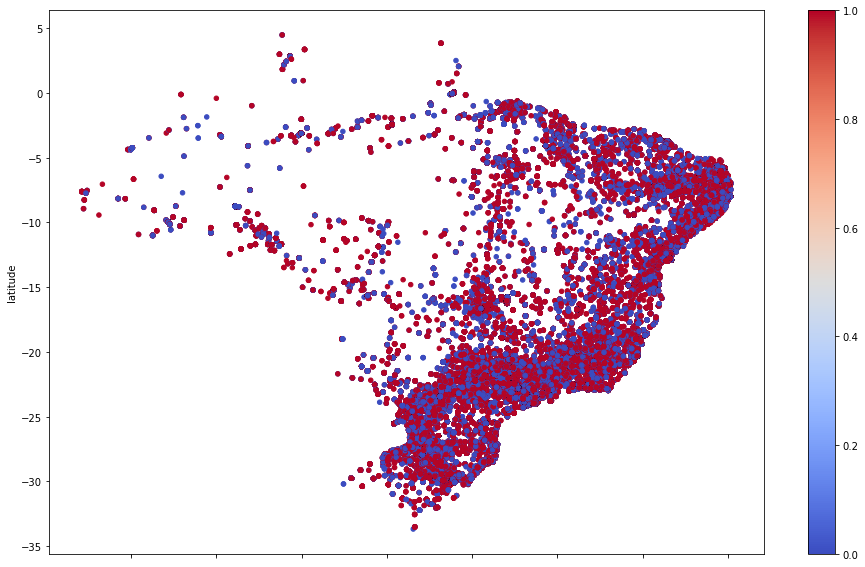

In [66]:
#gráfico de dispersão dos sexos dos beneficiários das bolsas ao redor do país
munpro.plot.scatter(x='longitude', y='latitude',c=munpro['SEXO_BENEFICIARIO_BOLSA'], cmap='coolwarm',figsize=(16,10))
plt.show()

In [144]:
#criando um dataframe com número de repetição para cada município
tr = munpro.groupby(by='MUNICIPIO_BENEFICIARIO_BOLSA').count()
dt = pd.DataFrame(tr['codigo_ibge'].values, columns=['cont'])
dt['mun'] = tr.index.values
dt

,cont,mun
0,18,ABADIA DE GOIAS
1,9,ABADIA DOS DOURADOS
2,9,ABADIANIA
3,15,ABAETE
4,182,ABAETETUBA
5,14,ABAIARA
6,4,ABAIRA
7,6,ABARE
8,4,ABATIA
9,3,ABDON BATISTA


In [145]:
#função merge() para unir os dataframes com o município aos valores de repetição dos mesmos.
munpr = pd.merge(munpro, dt, how='left', left_on=['MUNICIPIO_BENEFICIARIO_BOLSA'], right_on=['mun'])

In [147]:
munpr.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,...,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,cont,mun
0,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,298.0,UNIVERSIDADE PITÁGORAS UNOPAR,BOLSA INTEGRAL,...,***14197166**,0,PARDA,16/04/2000,N,Centro-Oeste,GO,ABADIA DE GOIAS,18.0,ABADIA DE GOIAS
1,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,***10993120**,1,PARDA,22/12/1982,N,Centro-Oeste,GO,ABADIA DE GOIAS,18.0,ABADIA DE GOIAS
2,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,322.0,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,...,***32068100**,1,PARDA,03/07/1987,N,Centro-Oeste,GO,ABADIA DE GOIAS,18.0,ABADIA DE GOIAS
3,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,2770.0,FACULDADE UNIDA DE CAMPINAS,BOLSA PARCIAL 50%,...,***78588164**,1,PARDA,29/01/1997,N,Centro-Oeste,GO,ABADIA DE GOIAS,18.0,ABADIA DE GOIAS
4,5200050,ABADIA DE GOIAS,-16.7573,-49.4412,0,52,2019.0,3987.0,FACULDADE UNIÃO DE GOYAZES,BOLSA PARCIAL 50%,...,***62477154**,1,PARDA,13/02/1999,N,Centro-Oeste,GO,ABADIA DE GOIAS,18.0,ABADIA DE GOIAS


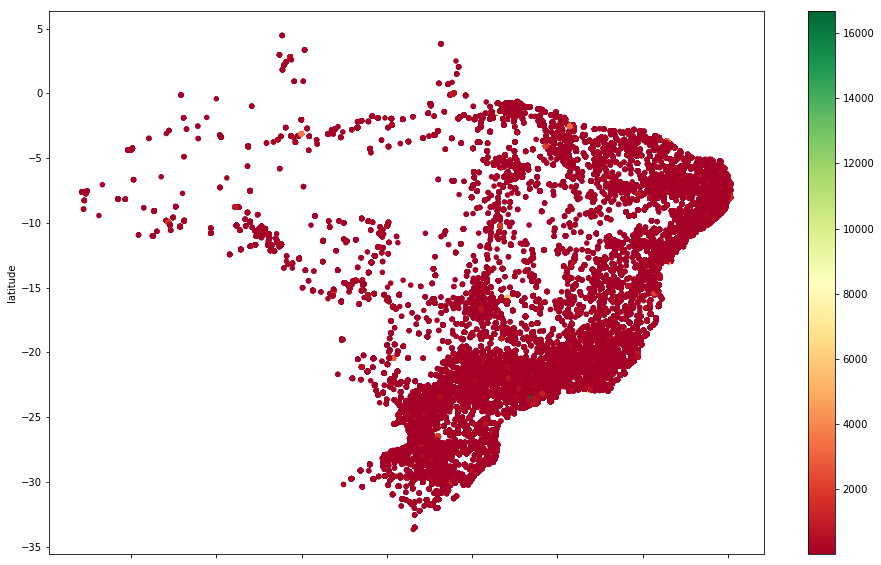

In [148]:
#gráfico de dispersão da quantidade de bolsas ao redor do país
munpr.plot.scatter(x='longitude', y='latitude',c=munpr['cont'], cmap='RdYlGn',figsize=(16,10))
plt.show()